# Form of linear classification model

Each class $C_k$ is described by its own linear model so that
$$y_k(\mathbf{x}) = \mathbf{w}_k^T\mathbf{x}+w_{k0} \tag{4.13}$$
where $k = 1,\cdots, K$. We can conviniently group these together using vector notations so that
<font color='Red'>$$\mathbf{y}(\mathbf{x}) = \widetilde{\mathbf{W}}^{T}\widetilde{\mathbf{x}} \tag{4.14}$$</font>
where
- $\mathbf{x}= \begin{bmatrix}x_1\\ \vdots\\ x_M\end{bmatrix}$ is the input.
- $\mathbf{y}(\mathbf{x}) = \begin{bmatrix} y_1(\mathbf{x}) \\ \vdots\\ y_K(\mathbf{x}) \end{bmatrix}$, is the output of the classifier. Each entry of the vector denotes the scaled distance from the decision surfaces to the point $\mathbf{x}$. And the class in which $\mathbf{x}$ has the biggest $y_k(\mathbf{x})$ is the expected class of the input $\mathbf{x}$.
- $\widetilde{\mathbf{x}} =\begin{bmatrix}1\\ \mathbf{x}\end{bmatrix}= \begin{bmatrix} 1\\ x_1\\ \vdots\\ x_M\end{bmatrix}$.
- $\widetilde{\mathbf{W}}
 =
\begin{bmatrix}
\widetilde{\mathbf{w}}_{1} &\widetilde{\mathbf{w}}_{2} &\cdots &\widetilde{\mathbf{w}}_{K}
\end{bmatrix}
=
\begin{bmatrix}
w_{10} &w_{20} &\cdots &w_{K0}\\
\mathbf{w}_{1} &\mathbf{w}_{2} &\cdots &\mathbf{w}_{K}
\end{bmatrix}
= \begin{bmatrix}
w_{10} &w_{20} &\cdots &w_{K0}\\
w_{11} &w_{21} &\cdots &w_{K1}\\
\vdots &\vdots &\ddots &\vdots\\
w_{1M} &w_{2M} &\cdots &w_{KM}
\end{bmatrix}$

# Parameter matrix evaluation
We now determine the parameter matrix $\widetilde{\mathbf{W}}$ by minimizing the sum-of-squares error function, as we did for regression in Chapter 3.

Consider a training data set $\{\mathbf{x}_n, \mathbf{t}_n\}$ where $n=1,\cdots,N$, and use the data set to define a matrix $\mathbf{T}$ and $\widetilde{\mathbf{X}}$.
- $\mathbf{t}_n$ takes the form $\begin{bmatrix}0\\ \vdots\\ 1\\ \vdots\\ 0\end{bmatrix}\leftarrow \left\{\begin{array}{ll}
\mathbf{t}_n[k] = 1 & k\ is\ the\ class\ of\ \mathbf{x}\\
\mathbf{t}_n[j] =0 & j\neq k\ is\ not\ the\ class\ of\ \mathbf{x}
\end{array}\right.$
- $\mathbf{T} = \begin{bmatrix}\mathbf{t}_1 &\cdots &\mathbf{t}_N\end{bmatrix}^T$.
- $\widetilde{\mathbf{X}} = \begin{bmatrix}\widetilde{\mathbf{x}}_1 &\cdots &\widetilde{\mathbf{x}}_N\end{bmatrix}^T$

Then the sum-of-squares error function can be written as
$$E_D(\widetilde{\mathbf{W}}) = \frac{1}{2}Tr\Big\{(\widetilde{\mathbf{X}}\widetilde{\mathbf{W}}-\mathbf{T})^T(\widetilde{\mathbf{X}}\widetilde{\mathbf{W}}-\mathbf{T})\Big\} \tag{4.15}$$
Setting the derivative with respcet to $\widetilde{\mathbf{W}}$ to zero, and rearranging, we then obtain the solution for $\widetilde{\mathbf{W}}$ in the form
<font color='Red'>$$\widetilde{\mathbf{W}} = (\widetilde{\mathbf{X}}^T\widetilde{\mathbf{X}})^{-1}\widetilde{\mathbf{X}}^T\mathbf{T}=\widetilde{\mathbf{X}}^{\dagger}\mathbf{T} \tag{4.16}$$</font>
where $\widetilde{\mathbf{X}}^{\dagger}$ is the pseudo-inverse of the matrix $\widetilde{\mathbf{X}}$, as discussed in Section 3.1.1. We then obtain the discriminant function in the form
$$\mathbf{y}(\mathbf{x}) = \widetilde{\mathbf{W}}^T\widetilde{\mathbf{x}}=\mathbf{T}^{T}\Big(\widetilde{\mathbf{X}}^{\dagger}\Big)^{T}\widetilde{\mathbf{x}} \tag{4.17}$$

# Property
$$\left .\begin{array}{rr}
(4.18)&\mathbf{a}^T \mathbf{t}_n + b &= &0\\
(4.19)&\mathbf{a}^T \mathbf{y}(\mathbf{x})+b &= &0
\end{array}\right\}
\Rightarrow
\left\{
\begin{array}{ll}
\mathbf{a}^T = \begin{bmatrix}a_1 &\cdots &a_K\end{bmatrix}= \begin{bmatrix}-b &\cdots &-b\end{bmatrix}\\
\mathbf{y}_1+\cdots+\mathbf{y}_K=1
\end{array}
\right .
$$

The elements of $\mathbf{y}(\mathbf{x})$ will sum to 1 for any value of $\mathbf{x}$. However, the summation constaint alone is not sufficient to allow the model outputs to be interpreted as probabilities because they are not constrained to lie within the interval $(0,1)$.


# Problems
- Least-squares solutions lack robustness to outliers, and this applies equally to the classification application. The sum-of-error function penalizes predictions that are 'too correct' in that they lie a long way on the correct side of the decision boundary. (Mid figure)
- Classify multipule classes in a less dimensional space gives poor results. (Right figure)

<font color='Red'>The failure of least squares should not surprise us when we recall that it corresponds to maximum likelihood under the assumption of a Gaussian conditional distribution, whereas binary target vector clearly have a distribution that is far from Gaussian.</font>

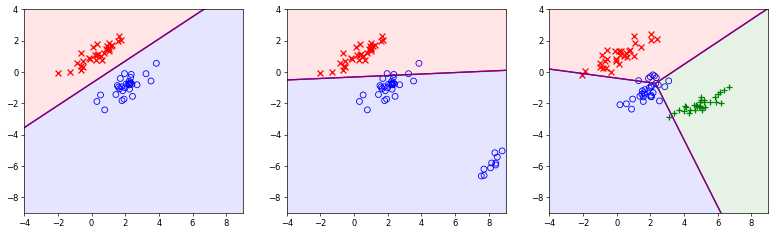

In [2]:
import numpy as np
import matplotlib.pyplot as plt

limX = [-4.0, 9.0]
limY = [-9.0, 4.0]

S1 = np.array([[1.0,.55],
               [.55,.4]])
S2 = np.array([[.6,.4],
               [.4,.5]])
S3 = np.array([[.25,.2],
               [.2,.25]])
S4 = np.array([[1.0,.55],
               [.55,.4]])

M1 = np.array([0, 1])
M2 = np.array([2, -1])
M3 = np.array([8, -6])
M4 = np.array([5, -2])

def evaluate_weights(X, T):
    W = np.linalg.inv(X.T @ X) @ X.T @ T
    return W

def draw_line(ax, X, T):
    x = np.linspace(limX[0], limX[1], 100)
    W = evaluate_weights(X, T)
    WT = W.T
    L = len(WT)
    Up = np.full(x.shape, limY[1]+1)
    Down = np.full(x.shape, limY[0]-1)
    Set = np.vstack((Up, Down))
    F = np.array([Set, Set, Set])
    
    # class
    C = np.array(['red', 'blue', 'green'])
    for i in range(L):
        for j in range(L):
            if j==i:
                continue
            
            # decision surface
            w = WT[i]-WT[j]
            y = -(w[0] + w[1]*x)/w[2]

            test_point = np.array([1, x[0], y[0]+1])
            test_y = WT @ test_point
            if test_y[i] < test_y[j]:
                F[i][0] = np.minimum(np.maximum(y, F[i][1]), F[i][0])
                F[j][1] = np.maximum(np.minimum(y, F[j][0]), F[j][1])
            else:
                F[j][0] = np.minimum(np.maximum(y, F[j][1]), F[j][0])
                F[i][1] = np.maximum(np.minimum(y, F[i][0]), F[i][1])
    for i in range(L):
        # eliminate the residual line
        for j in range(len(x)):
            if F[i][0][j] == F[i][1][j]:
                F[i][0][j] = np.NaN
                F[i][1][j] = np.NaN
        # fill color
        ax.fill_between(x, F[i][1], F[i][0], color=C[i], alpha=0.1)
        # draw line
        ax.plot(x, F[i][0], color='purple')
        ax.plot(x, F[i][1], color='purple')

def plot_points(ax, X, T):
    for i in range(len(X)):
        if T[i][0] == 1:
            ax.scatter(X[i][1], X[i][2], s=50, marker='x', edgecolors='red', color='red')
        elif T[i][1] == 1:
            ax.scatter(X[i][1], X[i][2], s=50, facecolors='none', edgecolors='blue')
        elif T[i][2] == 1:
            ax.scatter(X[i][1], X[i][2], s=50, marker='+', edgecolors='red', color='green')

def classify_2_classes(fig):
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax1.set_xlim(limX[0], limX[1])
    ax1.set_ylim(limY[0], limY[1])
    
    C1 = np.random.multivariate_normal(mean=M1, cov=S1, size=30)
    T1 = np.c_[np.ones((len(C1), 1)), np.zeros((len(C1), 1))]
    C2 = np.random.multivariate_normal(mean=M2, cov=S2, size=30)
    T2 = np.c_[np.zeros((len(C2), 1)), np.ones((len(C2), 1))]
    X = np.vstack((C1, C2))
    X = np.c_[np.ones((len(X), 1)), X]
    T = np.vstack((T1, T2))
    plot_points(ax1, X, T)
    draw_line(ax1, X, T)
    
    
    ax2.set_xlim(limX[0], limX[1])
    ax2.set_ylim(limY[0], limY[1])
    C3 = np.random.multivariate_normal(mean=M3, cov=S3, size=10)
    C3 = np.c_[np.ones((len(C3), 1)), C3]
    X = np.vstack((X, C3))
    T3 = np.c_[np.zeros((len(C3), 1)), np.ones((len(C3), 1))]
    T = np.vstack((T, T3))
    plot_points(ax2, X, T)
    draw_line(ax2, X, T)

def classify_3_classes(fig):
    ax3 = fig.add_subplot(1,3,3)
    ax3.set_xlim(limX[0], limX[1])
    ax3.set_ylim(limY[0], limY[1])
    
    C1 = np.random.multivariate_normal(mean=M1, cov=S1, size=30)
    T1 = np.c_[np.ones((len(C1), 1)), np.zeros((len(C1), 1)), np.zeros((len(C1), 1))]
    C2 = np.random.multivariate_normal(mean=M2, cov=S2, size=30)
    T2 = np.c_[np.zeros((len(C2), 1)), np.ones((len(C2), 1)), np.zeros((len(C2), 1))]
    C4 = np.random.multivariate_normal(mean=M4, cov=S4, size=30)
    T4 = np.c_[np.zeros((len(C4), 1)), np.zeros((len(C4), 1)), np.ones((len(C4), 1))]
    X = np.vstack((C1, C2, C4))
    X = np.c_[np.ones((len(X), 1)), X]
    T = np.vstack((T1, T2, T4))
    plot_points(ax3, X, T)
    draw_line(ax3, X, T)
            
def main():
    fig = plt.figure(figsize=(16,4.5), dpi=60)
    classify_2_classes(fig)
    classify_3_classes(fig)
    
    plt.show()
   


if __name__ == "__main__":
    main()